In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation and cleaning

In [102]:
# Let's read in the data
df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Exploratory Data Analysis

The target column of interest is `Reviewer_Score`.

<u>Question 1a: What is the shape of the dataframe?<u>

In [103]:
#Dataframe shape
df.shape

(515738, 17)

In [104]:
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe has 515738 rows and 17 columns.


<u>Question 1b: The reviews provided are all given as decimal values. Convert them into integers from 1 to 10<u>

In [105]:
#Find out the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

The Reviewer_Score column provides floating values, but we want to convert them into integers.

In [106]:
#Before converting the values into integers, I decided to round the values first
df['Reviewer_Score'] = round(df['Reviewer_Score'])
df['Reviewer_Score']

0         3.0
1         8.0
2         7.0
3         4.0
4         7.0
         ... 
515733    7.0
515734    6.0
515735    2.0
515736    9.0
515737    8.0
Name: Reviewer_Score, Length: 515738, dtype: float64

In [107]:
#Q1(b). Convert Reviewer_Score column into integers
df['Reviewer_Score'] = df['Reviewer_Score'].astype(int)
print(df['Reviewer_Score'])

#dtype shows this column is now an integer instead of a float, also decimals have been removed

0         3
1         8
2         7
3         4
4         7
         ..
515733    7
515734    6
515735    2
515736    9
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64


<u>Question 1c: The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?<u>

We should take a quick look at particular attributes of the dataset to highlight if any cleaning is required.

In [108]:
# EDA summary
print(f"Rows: {df['Reviewer_Score'].shape[0]}")
print(f"Missing values: {df['Reviewer_Score'].isna().sum().sum()}")
print(f"Duplicated rows: {df['Reviewer_Score'].duplicated().sum()}")

Rows: 515738
Missing values: 0
Duplicated rows: 515729


In [109]:
#Calculate the sum of duplicated rows
df.duplicated().sum()

526

In [110]:
#I will delete duplicate values 526 rows
df.drop_duplicates(inplace=True,ignore_index=True)

In [111]:
#Check again that duplicated rows are gone
df.duplicated().sum()

0

In [112]:
# Check summary statistics
df['Reviewer_Score'].describe()

count    515212.000000
mean          8.458019
std           1.683300
min           2.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: Reviewer_Score, dtype: float64

In [113]:
# Check to make sure if there are any null values that can influence this column
df['Reviewer_Score'].isna().sum()

#No null values

0

In [114]:
#Check the median score
print("Median score:", df['Reviewer_Score'].median())

Median score: 9.0


In [115]:
#Check the average score
print("Mean score:", df['Reviewer_Score'].mean())

Mean score: 8.45801922315474


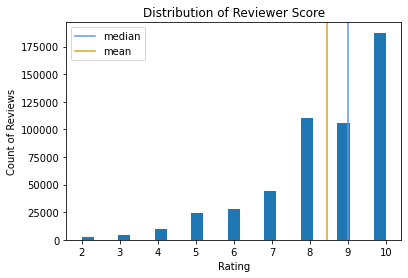

In [116]:
# Let's do a little EDA and visualize the reviewer score column to inform our decision
plt.figure()
plt.hist(df['Reviewer_Score'], bins=25)
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Reviewer Score')
plt.axvline(df['Reviewer_Score'].median(), label='median', color='cornflowerblue')
plt.axvline(df['Reviewer_Score'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

It appears that the mean and median of reviews are between 8 and 9. Let's do a value count to confirm this.

In [117]:
# Check all distinct values
df['Reviewer_Score'].value_counts().sort_index(ascending=False)

10    187592
9     105621
8     110035
7      44041
6      27765
5      24152
4       9421
3       4393
2       2192
Name: Reviewer_Score, dtype: int64

8, 9 and 10 was the most common score by reviewers by a wide margin.

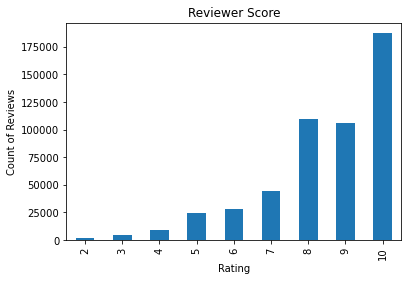

In [118]:
df['Reviewer_Score'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title('Reviewer Score')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.show()

In [119]:
#Checking the percentage of reviews for each score
df['Reviewer_Score'].value_counts()/df.shape[0]*100.0

10    36.410643
8     21.357228
9     20.500493
7      8.548132
6      5.389044
5      4.687779
4      1.828568
3      0.852659
2      0.425456
Name: Reviewer_Score, dtype: float64

Since most of the reviews are 8 or higher, I decided to create a binary column to see how many reviews are greater than or equal to 8 vs how many reviews were below an 8.

In [120]:
#Make a binary column to detect how many reviews are 8 and above or lower
df['Positive_or_Negative']= np.where(df['Reviewer_Score'] >= 8, 1, 0)

In [121]:
#Counting the amount of scores that are greater than or equal to 8 and below
df['Positive_or_Negative'].value_counts()

1    403248
0    111964
Name: Positive_or_Negative, dtype: int64

In [122]:
#Calculating the percentage
df['Positive_or_Negative'].value_counts()/df['Positive_or_Negative'].shape[0]*100.0

1    78.268363
0    21.731637
Name: Positive_or_Negative, dtype: float64

The percentage of reviews that are 8 and above are significantly more than those that are below an 8. I'll address what kind of problem this can cause in the next question.

We will drop Positive_or_Negative since we just encoded it into a new column:

In [123]:
df.drop(columns = 'Positive_or_Negative',inplace = True)

<u>Question 1d: Given this will be a classification problem, what is a potential problem with this distribution?<u>

The purpose of keeping track of reviews is evaluate how many visitors are having positive experiences compared to those who have had negative experiences.

The problem with this distribution is the imbalance of classifications. If we are to make a binary classification of the scores and classify the reviews that received a score of 8 and above as Positive and everything below an 8 is Negative then we see that the distribution of Positive vs Negative is not even.

78% of the scores are Positive whereas 22% are Negative.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class.

The authenticity of these ratings is questionable as people who often leave reviews could be more inclined to be more positive than those who didn't enjoy their experience and prefer not to say anything at all.

<u>Question 2: This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?<u>

In [124]:
#Let's check again which columns are numeric and which ones are non-numeric.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515212 entries, 0 to 515211
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        515212 non-null  object 
 6   Negative_Review                             515212 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515212 non-null  object 
 

In [125]:
#Let's check to see if any columns have any null values that can influence the data.
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [126]:
#Since there is a minimal set of null values and they are only on the Lat and Long columns
#I decided to drop these 2 columns. Also they don't add any useful information since we already have
#the address of the hotels.
df.drop(['lat', 'lng'], axis=1, inplace=True)

In [127]:
#Check that the latitude and longitude columns are dropped
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


In [128]:
# Make a dataframe with only the numeric columns
numeric_df = df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
0,194,7.7,397,1403,11,7,3
1,194,7.7,0,1403,105,7,8
2,194,7.7,42,1403,21,9,7
3,194,7.7,210,1403,26,1,4
4,194,7.7,140,1403,8,3,7


In [129]:
# Make a new dataframe of only the categorical columns
categorical_df = df.select_dtypes('object').copy()

# Check
categorical_df.head()

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,8/3/2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/31/2017,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,7/24/2017,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


The goal of the dataset is to add sentiment and columns that will help choose the best hotel.

### Hotel Address

I'm going to check the amount of unique values for `Hotel Address`

In [130]:
df['Hotel_Address'].nunique()

1493

The addresses are very long, so I'd rather replace `Hotel_Address` values with the name of the city and country.

In [131]:
#Splitting the last two parts of the address column to find out the city and country of each row
df["Hotel_Address"]=df["Hotel_Address"].map(lambda x: " ".join(x.split()[-2:]))

In [132]:
#Get the value count of the different cities
df["Hotel_Address"].value_counts()

United Kingdom           262298
Barcelona Spain           60149
Paris France              59413
Amsterdam Netherlands     57211
Vienna Austria            38937
Milan Italy               37204
Name: Hotel_Address, dtype: int64

In [133]:
#Replacing United Kingdom with London, UK
df['Hotel_Address'] = df['Hotel_Address'].replace({"United Kingdom": "London UK"})

In [134]:
#Check
df['Hotel_Address'].value_counts()

London UK                262298
Barcelona Spain           60149
Paris France              59413
Amsterdam Netherlands     57211
Vienna Austria            38937
Milan Italy               37204
Name: Hotel_Address, dtype: int64

These are the only cities and countries in the dataset (alphabetical order):

Amsterdam, Netherlands

Barcelona, Spain

London, United Kingdom

Milan, Italy

Paris, France

Vienna, Austria

In [135]:
#Replacing the Hotel Addresses with just the city and country they are in and removing the street names
def replace_address(row):
    if "Amsterdam" in row["Hotel_Address"]:
        return "Amsterdam, Netherlands"
    elif "Barcelona" in row["Hotel_Address"]:
        return "Barcelona, Spain"
    elif "United Kingdom" in row["Hotel_Address"]:
        return "London, United Kingdom"
    elif "Milan" in row["Hotel_Address"]:        
        return "Milan, Italy"
    elif "Paris" in row["Hotel_Address"]:
        return "Paris, France"
    elif "Vienna" in row["Hotel_Address"]:
        return "Vienna, Austria" 
    else:
        return row.Hotel_Address

In [136]:
# Replace all the addresses with a shortened, more useful form
df["Hotel_Address"] = df.apply(replace_address, axis = 1)

In [137]:
# The sum of the value_counts() should add up to the total number of reviews
print(df["Hotel_Address"].value_counts())

London UK                 262298
Barcelona, Spain           60149
Paris, France              59413
Amsterdam, Netherlands     57211
Vienna, Austria            38937
Milan, Italy               37204
Name: Hotel_Address, dtype: int64


In [138]:
#Checking to see how many unique hotels show up in each city
display(df.groupby("Hotel_Address").agg({"Hotel_Name": "nunique"}).reset_index())

,Hotel_Address,Hotel_Name
0,"Amsterdam, Netherlands",105
1,"Barcelona, Spain",211
2,London UK,400
3,"Milan, Italy",162
4,"Paris, France",458
5,"Vienna, Austria",158


### Review Date & days since review

I'm going to check the amount of unique values for `Review Date` and `days since review` since they should be the same.

In [139]:
df['Review_Date'].nunique()

731

In [140]:
df['days_since_review'].nunique()

731

I confirmed their numbers match exactly. These 2 columns are redundant columns since you can figure out the amount of days since the review just by looking at the date the review was written. I would turn the Review_Date into a numeric column and drop the days since review column.

In [141]:
#Check the dates
df['Review_Date']

0          8/3/2017
1          8/3/2017
2         7/31/2017
3         7/31/2017
4         7/24/2017
            ...    
515207    8/30/2015
515208    8/22/2015
515209    8/19/2015
515210    8/17/2015
515211     8/9/2015
Name: Review_Date, Length: 515212, dtype: object

Since there are so many unique dates, I'm going to break up the dates to see if there's a way to consolidate the information.

In [142]:
# Splitting up dates by /
date_df = df['Review_Date'].str.split("/", expand=True)
date_df

,0,1,2
0,8,3,2017
1,8,3,2017
2,7,31,2017
3,7,31,2017
4,7,24,2017
...,...,...,...
515207,8,30,2015
515208,8,22,2015
515209,8,19,2015
515210,8,17,2015


I believe year will have the fewest unique values, I think it's easiest to create a new colum based on the year.

In [143]:
#Filtering out the years featured in this data
date_df[2].value_counts()

2016    264153
2017    156681
2015     94378
Name: 2, dtype: int64

The dates range from 2015-2017, I will turn `Review Date` column into just the years to make it easier to turn numeric

In [144]:
#Turning the Review_Date column into just the years from this dataframe
df['Review_Date'] = date_df[2]

In [145]:
#Checking to confirm the change has occurred
df['Review_Date']

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
515207    2015
515208    2015
515209    2015
515210    2015
515211    2015
Name: Review_Date, Length: 515212, dtype: object

### Hotel Name

In [146]:
#Checking to see how many unique hotel names there are.
df['Hotel_Name'].nunique()

1492

In [147]:
#Checking to see the names of the most prevalant hotel names.
df['Hotel_Name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3577
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

I decided not to include Hotel Name since there are just too many unique hotel names, I won't be able to filter it down to convert this column into numeric without adding hundreds more columns to the dataframe.

### Reviewer Nationality

In [148]:
#Checking to see how many different nationalities there are.
df['Reviewer_Nationality'].nunique()

227

In [149]:
#Counting the different amount of times each country is mentioned.
df['Reviewer_Nationality'].value_counts().head(20)

 United Kingdom               245110
 United States of America      35349
 Australia                     21648
 Ireland                       14814
 United Arab Emirates          10229
 Saudi Arabia                   8940
 Netherlands                    8757
 Switzerland                    8669
 Germany                        7929
 Canada                         7883
 France                         7265
 Israel                         6601
 Italy                          6113
 Belgium                        6024
 Turkey                         5440
 Kuwait                         4915
 Spain                          4735
 Romania                        4548
 Russia                         3898
 South Africa                   3816
Name: Reviewer_Nationality, dtype: int64

I decided not to include Reviewer Nationality, since all these cities are in Europe, this column could be skewed since people from certain countries have easier and closer proximity to these hotels than others. Some countries might have a larger population or people from certain countries are more willing to travel to these particular cities than others as well.

### Tags

I decided to keep the Tags column. The tags provide information about the travellers that can be useful to others who have similar attributes.

In [150]:
#Check
df['Tags']

0         [' Leisure trip ', ' Couple ', ' Duplex Double...
1         [' Leisure trip ', ' Couple ', ' Duplex Double...
2         [' Leisure trip ', ' Family with young childre...
3         [' Leisure trip ', ' Solo traveler ', ' Duplex...
4         [' Leisure trip ', ' Couple ', ' Suite ', ' St...
                                ...                        
515207    [' Leisure trip ', ' Family with older childre...
515208    [' Leisure trip ', ' Family with young childre...
515209    [' Leisure trip ', ' Family with older childre...
515210    [' Leisure trip ', ' Group ', ' Standard Tripl...
515211    [' Leisure trip ', ' Family with young childre...
Name: Tags, Length: 515212, dtype: object

I can tell the data is divided by commas, time to split them into separate columns to make it more readable.

In [151]:
# Apply split using an accessor
tag_df = df['Tags'].str.split(", ", expand=True)
tag_df

,0,1,2,3,4,5
0,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 6 nights '],None,None
1,[' Leisure trip ',' Couple ',' Duplex Double Room ',' Stayed 4 nights '],None,None
2,[' Leisure trip ',' Family with young children ',' Duplex Double Room ',' Stayed 3 nights ',' Submitted from a mobile device '],None
3,[' Leisure trip ',' Solo traveler ',' Duplex Double Room ',' Stayed 3 nights '],None,None
4,[' Leisure trip ',' Couple ',' Suite ',' Stayed 2 nights ',' Submitted from a mobile device '],None
...,...,...,...,...,...,...
515207,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 5 nights '],None,None
515208,[' Leisure trip ',' Family with young children ',' Standard Triple Room ',' Stayed 2 nights '],None,None
515209,[' Leisure trip ',' Family with older children ',' 2 rooms ',' Stayed 4 nights ',' Submitted from a mobile device '],None
515210,[' Leisure trip ',' Group ',' Standard Triple Room ',' Stayed 3 nights '],None,None


While the columns are split, the data looks messy, a lot of brackets and quotes in the way, need to remove those.

In [152]:
# Remove opening and closing brackets
df['Tags'] = df['Tags'].str.strip("[']")
# remove all quotes too
df['Tags'] = df['Tags'].str.replace(" ', '", ",", regex = False)

In [153]:
#Checking the dataframe and splitting the commas again, hopefully the dataframe looks neater now.
tag_df = df['Tags'].str.split(", ", expand=True)
tag_df

,0,1,2,3,4,5
0,Leisure trip,Couple,Duplex Double Room,Stayed 6 nights,None,None
1,Leisure trip,Couple,Duplex Double Room,Stayed 4 nights,None,None
2,Leisure trip,Family with young children,Duplex Double Room,Stayed 3 nights,Submitted from a mobile device,None
3,Leisure trip,Solo traveler,Duplex Double Room,Stayed 3 nights,None,None
4,Leisure trip,Couple,Suite,Stayed 2 nights,Submitted from a mobile device,None
...,...,...,...,...,...,...
515207,Leisure trip,Family with older children,2 rooms,Stayed 5 nights,None,None
515208,Leisure trip,Family with young children,Standard Triple Room,Stayed 2 nights,None,None
515209,Leisure trip,Family with older children,2 rooms,Stayed 4 nights,Submitted from a mobile device,None
515210,Leisure trip,Group,Standard Triple Room,Stayed 3 nights,None,None


Each columns appears to provide different information describing the type of stay each guest had.

- First column describes the type of trip.
- Second column describes the type of guest.
- Third column describes the type of room.
- Fourth column desribes the length of stay.
- Fifth column describes whether room was reserved by mobile device or not
- Sixth column is an extra column that sometimes mentions if room was reserved by mobile device or not

I'm curious to see the categories listed in each column

In [154]:
tag_df[0].value_counts()

 Leisure trip                   416249
 Business trip                   82662
 Couple                           5801
 Solo traveler                    4282
 Family with young children       2223
 Group                            1598
 With a pet                       1405
 Family with older children        930
 Travelers with friends             56
 Couple                              3
 Group                               2
 Family with young children          1
Name: 0, dtype: int64

In [155]:
tag_df[1].value_counts()

Couple                                       245469
Solo traveler                                103955
Group                                         63595
Family with young children                    58536
Family with older children                    25298
                                              ...  
Superior Room with King Bed                       1
Halkin Room                                       1
Twin Hilton Deluxe Room                           1
Superior Twin Room with Eiffel Tower View         1
Superior King                                     1
Name: 1, Length: 1030, dtype: int64

In [156]:
tag_df[2].value_counts()

Double Room                                            34027
Standard Double Room                                   31239
Superior Double Room                                   30399
Deluxe Double Room                                     23982
Double or Twin Room                                    21732
                                                       ...  
Stayed 30 nights                                           1
One Bedroom Apsley Suite                                   1
King Room with Disability Access Non Smoking               1
King Suite Non Smoking with Executive Lounge Access        1
Courtyard Suite with St Stephen s Cathedral view           1
Name: 2, Length: 2434, dtype: int64

In [157]:
tag_df[3].value_counts()

Stayed 1 night                                                          112739
Stayed 2 nights                                                          77487
Stayed 1 night                                                           73633
Stayed 3 nights                                                          55086
Stayed 2 nights                                                          52646
                                                                         ...  
Double or Twin Ground Floor                                                  1
Duplex Junior Suite with Spa access                                          1
Double Room with Free Airport Shuttle Service from 5 00am to 00 30am         1
Twin Room Disability Access                                                  1
Classic Queen Room                                                           1
Name: 3, Length: 358, dtype: int64

In [158]:
tag_df[4].value_counts()

Submitted from a mobile device     297008
Stayed 1 night                        311
Stayed 1 night                        241
Stayed 2 nights                       197
Stayed 2 nights                       145
Stayed 3 nights                       127
Stayed 3 nights                        99
Stayed 4 nights                        59
Stayed 4 nights                        28
Stayed 5 nights                        28
Stayed 5 nights                        16
Stayed 7 nights                        11
Stayed 6 nights                        10
Stayed 6 nights                         5
Stayed 7 nights                         4
Stayed 8 nights                         3
Stayed 9 nights                         2
Stayed 11 nights                        2
Stayed 10 nights                        2
Stayed 14 nights                        1
Stayed 18 nights                        1
Stayed 9 nights                         1
Stayed 20 nights                        1
Stayed 14 nights                  

In [159]:
tag_df[5].value_counts()

Submitted from a mobile device     755
Name: 5, dtype: int64

Here, I find a problem. Some reviews, or rows, have different amount of columns, some have 5 columns, some 3 and others 6. This leads to some data that is prevelant in one column, to shows up in a different column.

For example, the 2nd column is predominantly showcasing the group type such as couple, solo traveler, group. However, that data also appears in the first column and less frequently, which is not what we want.

This is a result of how the dataset was created, and hard to fix. We want to get a frequency count of each phrase, but they are in different order in each review, so the count might be off, and a hotel might not get a tag assigned to it that it deserved.

The simplest way to clean this up is to create 6 temporary columns with each tag inserted in to the column corresponding to its order in the tag. Then merge the 6 columns into one big column and run the value_counts() method on the resulting column. 

In [160]:
# Remove leading and trailing spaces
df["Tag_1"] = tag_df[0].str.strip()
df["Tag_2"] = tag_df[1].str.strip()
df["Tag_3"] = tag_df[2].str.strip()
df["Tag_4"] = tag_df[3].str.strip()
df["Tag_5"] = tag_df[4].str.strip()
df["Tag_6"] = tag_df[5].str.strip()

In [161]:
# Merge the 6 columns into one with melt
df_tags = df.melt(value_vars=["Tag_1", "Tag_2", "Tag_3", "Tag_4", "Tag_5", "Tag_6"])

In [162]:
#Get the value count of the most popular tags
df_tags.value.value_counts().head(20)

Leisure trip                      417355
Submitted from a mobile device    307355
Couple                            252005
Stayed 1 night                    193497
Stayed 2 nights                   133809
Solo traveler                     108431
Stayed 3 nights                    95706
Business trip                      82853
Group                              65338
Family with young children         60975
Stayed 4 nights                    47750
Double Room                        35207
Standard Double Room               32245
Superior Double Room               31331
Family with older children         26320
Deluxe Double Room                 24804
Double or Twin Room                22393
Stayed 5 nights                    20818
Standard Double or Twin Room       17463
Classic Double Room                16790
Name: value, dtype: int64

We need to ask ourselves which tags are useful or not in the final dataset.

- The type of trip is relevant and that should stay

- The type of guest is important and that should stay

- The type of room or suite that the guest stayed in can go. There's too many unique tags that describe the room type and too difficult to differentiate whether room type affects satisfaction.

- The device the review was submitted on is irrelevant

- The number of nights reviewer stayed is likely irrelevant, most guests already plan on how long they are going to stay and typically just pick one hotel for the duration of their trip for convenience, so length of stay isn't very insightful.

In [163]:
# print(shape)
print("The shape of the tags with no filtering:", str(df_tags.shape))
# Drop rooms, suites, and length of stay, mobile device and anything with less count than a 1000
df_tags = df_tags[~df_tags.value.str.contains("Standard|room|Stayed|device|Beds|Suite|Studio|King|Superior|Double", na=False, case=False)]
tag_vc = df_tags.value.value_counts().reset_index(name="count").query("count > 1000")
# Print the top 10 (there should only be 9 and we'll use these in the filtering section)
print(tag_vc[:10])

The shape of the tags with no filtering: (3091272, 2)
                        index   count
0                Leisure trip  417355
1                      Couple  252005
2               Solo traveler  108431
3               Business trip   82853
4                       Group   65338
5  Family with young children   60975
6  Family with older children   26320
7      Travelers with friends    2143
8                  With a pet    1405


In [164]:
# Process the Tags into new columns
# Leisure trip, Couple, Solo traveler, Business trip, Group combined with Travelers with friends, 
# Family with young children, Family with older children, With a pet
df["Leisure_trip"] = df.Tags.apply(lambda tag: 1 if "Leisure trip" in tag else 0)
df["Couple"] = df.Tags.apply(lambda tag: 1 if "Couple" in tag else 0)
df["Solo_traveler"] = df.Tags.apply(lambda tag: 1 if "Solo traveler" in tag else 0)
df["Business_trip"] = df.Tags.apply(lambda tag: 1 if "Business trip" in tag else 0)
df["Group"] = df.Tags.apply(lambda tag: 1 if "Group" in tag or "Travelers with friends" in tag else 0)
df["Family_with_young_children"] = df.Tags.apply(lambda tag: 1 if "Family with young children" in tag else 0)
df["Family_with_older_children"] = df.Tags.apply(lambda tag: 1 if "Family with older children" in tag else 0)
df["With_a_pet"] = df.Tags.apply(lambda tag: 1 if "With a pet" in tag else 0)

I'm going to check the value counts for some of these new columns to see the outcome.

In [165]:
df["Leisure_trip"].value_counts()

1    417355
0     97857
Name: Leisure_trip, dtype: int64

In [166]:
df["Couple"].value_counts()

0    263207
1    252005
Name: Couple, dtype: int64

In [167]:
df["Family_with_young_children"].value_counts()

0    454237
1     60975
Name: Family_with_young_children, dtype: int64

Running the value counts for some of the new columns shows that each of the columns are now binary.

Since I created the 8 new columns, I'm going to drop the 6 temporary columns I created earlier.

In [168]:
#Dropping the 6 temp columns
df.drop(['Tag_1', 'Tag_2', 'Tag_3', 'Tag_4', 'Tag_5', 'Tag_6'], axis=1, inplace=True)

In [169]:
#Checking to see that the new tag columns I created are added to the dataframe
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet
0,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days,1,1,0,0,0,0,0,0
1,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days,1,1,0,0,0,0,0,0
2,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"Leisure trip, Family with young children, Dup...",3 days,1,0,0,0,0,1,0,0
3,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"Leisure trip, Solo traveler, Duplex Double Ro...",3 days,1,0,1,0,0,0,0,0
4,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"Leisure trip, Couple, Suite, Stayed 2 nights,...",10 days,1,1,0,0,0,0,0,0


### Data Wrangling

Question 3a: Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [170]:
#Creating a new binary column
df['Good or Not Good'] = np.where(df['Reviewer_Score'] >= 9, 1, 0)

In [171]:
#Checking to see new column added to df
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Good or Not Good
0,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days,1,1,0,0,0,0,0,0,0
1,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days,1,1,0,0,0,0,0,0,0
2,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"Leisure trip, Family with young children, Dup...",3 days,1,0,0,0,0,1,0,0,0
3,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"Leisure trip, Solo traveler, Duplex Double Ro...",3 days,1,0,1,0,0,0,0,0,0
4,"Amsterdam, Netherlands",194,2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"Leisure trip, Couple, Suite, Stayed 2 nights,...",10 days,1,1,0,0,0,0,0,0,0


In [172]:
#Checking value count for new column
df['Good or Not Good'].value_counts()

1    293213
0    221999
Name: Good or Not Good, dtype: int64

In [173]:
#Checking percentage of scores that are Good vs Not Good
df['Good or Not Good'].value_counts()/df['Good or Not Good'].shape[0]*100.0

1    56.911136
0    43.088864
Name: Good or Not Good, dtype: float64

Data is still a bit imbalanced as reviewers left scores between 2 and 10, yet the reviews that received a 9 or 10 appeared 57% of the time in this dataframe and all other scores showed up only 43% of the time.

<u>Question 3b: Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.<u>

In [174]:
#Checking the dataframe for categorical columns again
categorical_df = df.select_dtypes('object').copy()

#Check
categorical_df.head()

,Hotel_Address,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Tags,days_since_review
0,"Amsterdam, Netherlands",2017,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days
1,"Amsterdam, Netherlands",2017,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days
2,"Amsterdam, Netherlands",2017,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,"Leisure trip, Family with young children, Dup...",3 days
3,"Amsterdam, Netherlands",2017,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,"Leisure trip, Solo traveler, Duplex Double Ro...",3 days
4,"Amsterdam, Netherlands",2017,Hotel Arena,New Zealand,You When I booked with your company on line y...,Amazing location and building Romantic setting,"Leisure trip, Couple, Suite, Stayed 2 nights,...",10 days


In [175]:
# Checking the dataframes with only the numeric columns again, 9 new ones should be added from the past 2 questions
numeric_df = df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Good or Not Good
0,194,7.7,397,1403,11,7,3,1,1,0,0,0,0,0,0,0
1,194,7.7,0,1403,105,7,8,1,1,0,0,0,0,0,0,0
2,194,7.7,42,1403,21,9,7,1,0,0,0,0,1,0,0,0
3,194,7.7,210,1403,26,1,4,1,0,1,0,0,0,0,0,0
4,194,7.7,140,1403,8,3,7,1,1,0,0,0,0,0,0,0


In [176]:
# checking categorical features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review'],
      dtype='object')

As I stated in Question 2, I'm going to turn the Hotel Address and Review Date columns into numeric. I already converted the Tags column into 8 new numeric columns.

Hotel Name, Reviewer Nationality and days since review will not be converted and I will drop these columns later on.

I'm supposed to leave the Positive Review and Negative Review columns the same.

I'm going to turn Hotel Address and Review Date into numeric columns using one hot encoder.

In [177]:
# One-hot encoding multiple columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset

df1 = df[['Hotel_Address', 'Review_Date']]


transformer = make_column_transformer(
    (OneHotEncoder(), ['Hotel_Address', 'Review_Date']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
transformed_df.head()

,"onehotencoder__x0_Amsterdam, Netherlands","onehotencoder__x0_Barcelona, Spain",onehotencoder__x0_London UK,"onehotencoder__x0_Milan, Italy","onehotencoder__x0_Paris, France","onehotencoder__x0_Vienna, Austria",onehotencoder__x1_2015,onehotencoder__x1_2016,onehotencoder__x1_2017,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Good or Not Good
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days,1,1,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"Leisure trip, Couple, Duplex Double Room, Sta...",0 days,1,1,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"Leisure trip, Family with young children, Dup...",3 days,1,0,0,0,0,1,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"Leisure trip, Solo traveler, Duplex Double Ro...",3 days,1,0,1,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"Leisure trip, Couple, Suite, Stayed 2 nights,...",10 days,1,1,0,0,0,0,0,0,0


I converted Hotel Address and Review date into 9 new columns and now I'm going to drop all the categorical columns I don't need anymore.

In [178]:
#Dropping all the categorical columns I don't need anymore
df.drop(['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality',
         'Tags', 'days_since_review'], axis=1, inplace=True)

I'm going to concatenate the transformed_df with df, but I don't want to repeat any columns, so I will drop all columns except the onehotencoded columns I created for transformed_df.

In [179]:
#Dropping repeated columns
transformed_df.drop(['Additional_Number_of_Scoring', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review',
                    'Tags', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review',
                     'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
                     'days_since_review', 'Leisure_trip', 'Couple', 'Solo_traveler', 'Business_trip',
                     'Group', 'Family_with_young_children', 'Family_with_older_children', 'With_a_pet', 'Good or Not Good'], axis=1, inplace=True)

In [180]:
#Concatenating the one hot encoded columns to the dataframe
df = pd.concat([transformed_df, df], axis=1)

In [181]:
#I want to make sure I can see all columns
pd.options.display.max_columns = None

In [182]:
#Checking all the numerical columns and leaving Positive Review and Negative Review as the only categorical columns
df.head()

,"onehotencoder__x0_Amsterdam, Netherlands","onehotencoder__x0_Barcelona, Spain",onehotencoder__x0_London UK,"onehotencoder__x0_Milan, Italy","onehotencoder__x0_Paris, France","onehotencoder__x0_Vienna, Austria",onehotencoder__x1_2015,onehotencoder__x1_2016,onehotencoder__x1_2017,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Good or Not Good
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,1,1,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,1,1,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,1,0,0,0,0,1,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,1,0,1,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,1,1,0,0,0,0,0,0,0


In [183]:
#Print the different columsn in dataframe
print(df.columns)

Index(['onehotencoder__x0_Amsterdam, Netherlands',
       'onehotencoder__x0_Barcelona, Spain', 'onehotencoder__x0_London UK',
       'onehotencoder__x0_Milan, Italy', 'onehotencoder__x0_Paris, France',
       'onehotencoder__x0_Vienna, Austria', 'onehotencoder__x1_2015',
       'onehotencoder__x1_2016', 'onehotencoder__x1_2017',
       'Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Leisure_trip', 'Couple', 'Solo_traveler', 'Business_trip', 'Group',
       'Family_with_young_children', 'Family_with_older_children',
       'With_a_pet', 'Good or Not Good'],
      dtype='object')


<u>Question 3c: Split the data into train and test sets.<u>

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
#Checking the dataframe for categorical columns again, will only included the new one hot encoded columns
#plus negative and positive review columns
categorical_df = df.select_dtypes('object').copy()

#Check
categorical_df.head()

,"onehotencoder__x0_Amsterdam, Netherlands","onehotencoder__x0_Barcelona, Spain",onehotencoder__x0_London UK,"onehotencoder__x0_Milan, Italy","onehotencoder__x0_Paris, France","onehotencoder__x0_Vienna, Austria",onehotencoder__x1_2015,onehotencoder__x1_2016,onehotencoder__x1_2017,Negative_Review,Positive_Review
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No Negative,No real complaints the hotel was great great ...
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,You When I booked with your company on line y...,Amazing location and building Romantic setting


In [186]:
# Checking the dataframes with only the numeric columns again, new ones should be added from the previous questions
numeric_df = df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Good or Not Good
0,194,7.7,397,1403,11,7,3,1,1,0,0,0,0,0,0,0
1,194,7.7,0,1403,105,7,8,1,1,0,0,0,0,0,0,0
2,194,7.7,42,1403,21,9,7,1,0,0,0,0,1,0,0,0
3,194,7.7,210,1403,26,1,4,1,0,1,0,0,0,0,0,0
4,194,7.7,140,1403,8,3,7,1,1,0,0,0,0,0,0,0


In [187]:
#Making the X and Y values
X = numeric_df
y = categorical_df

In [188]:
# splitting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=2)

In [189]:
# size of training data
X_train.shape

(345192, 16)

In [190]:
# size of test data
X_test.shape

(170020, 16)

In [191]:
y_train.shape

(345192, 11)

In [192]:
y_test.shape

(170020, 11)

<u>Question 3d: Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.<u>

In [193]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Vectorizing the Positive Review column into a sparse matrix

In [194]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=5)

# 2. Fit 
bagofwords.fit(df["Positive_Review"])

# 3. Transform
positive_transformed = bagofwords.transform(df["Positive_Review"])
positive_transformed

<515212x13041 sparse matrix of type '<class 'numpy.int64'>'
	with 4380727 stored elements in Compressed Sparse Row format>

Vectorizing the Negative Review column into a sparse matrix

In [195]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=5)

# 2. Fit 
bagofwords.fit(df["Negative_Review"])

# 3. Transform
negative_transformed = bagofwords.transform(df["Negative_Review"])
negative_transformed

<515212x15157 sparse matrix of type '<class 'numpy.int64'>'
	with 3818868 stored elements in Compressed Sparse Row format>

Vectorizing the Numeric dataframe into a sparse matrix

In [196]:
# 1. Instantiate 
bagofwords = CountVectorizer(stop_words="english", min_df=1)

# 2. Fit 
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<16x16 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

When I vectorize the numeric dataframe I can only execute the code if I change the min_df=1. Any other number will result in an error.

Combining the Postive Review, Negative Review and Numeric column using a column transformer.

In [197]:
#Combine Positive_Review, Negative_Review and numeric columns
from sklearn.compose import make_column_transformer
ct = make_column_transformer ((bagofwords, 'Positive_Review'), (bagofwords, 'Negative_Review'), (bagofwords, X_train))
ct.fit_transform

<bound method ColumnTransformer.fit_transform of ColumnTransformer(transformers=[('countvectorizer-1',
                                 CountVectorizer(stop_words='english'),
                                 'Positive_Review'),
                                ('countvectorizer-2',
                                 CountVectorizer(stop_words='english'),
                                 'Negative_Review'),
                                ('countvectorizer-3',
                                 CountVectorizer(stop_words='english'),
                                         Additional_Number_of_Scoring  Average_Score  \
354090                           174            8.8   
207147                           545            8.0   
287393                            61            8.1   
446610                           416            8.5   
319214                           341            7.8   
.....
319214             1       1              0              0      0   
...              ...     ... 

<u>Question 3e: What does the min_df parameter do?<u>

min_df is used for removing terms that appear too infrequently

min_df = 1, which means "ignore terms that appear in less than 1 document".